In [21]:
!pip install --upgrade scrapbook -q

In [22]:
import papermill as pm
import scrapbook as sb
import pandas as pd
from datetime import datetime, timedelta
import os

In [23]:
connection_string = 'sqlite:///data.db'

In [24]:
tokens = pd.read_sql('SELECT DISTINCT token FROM ohlc', connection_string)

In [25]:
tokens=tokens['token'].tolist()

In [26]:
tokens

['BTC',
 'ETH',
 'USDT',
 'SOL',
 'ADA',
 'DOT',
 'AVAX',
 'ATOM',
 'CRV',
 'AAVE',
 'COMP']

In [27]:
def last_dow(d: datetime, dow: int) -> datetime:
    '''
    Gets the date of the last day of week, using datetime convention of Monday is 0 and Sunday is 6
    '''
    dow_d = d.weekday()
    days_delta = (7 - dow) + dow_d if dow_d < dow else dow_d - dow
    return d - timedelta(days=days_delta)

In [28]:
run_dates = [(last_dow(datetime(2021, 11, 5), 4) + timedelta(days=7 * x)) for x in range(1)]

In [29]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [30]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=7)}', end='\r')
        res = pm.execute_notebook(
            'hw4_template.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{run_date}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=7)}',
                'token': token,
                'connection_string': connection_string
            }
        )

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

Executing:   0%|          | 0/21 [00:00<?, ?cell/s]

In [31]:
nbs = sb.read_notebooks('outputs')

In [33]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'hourly return': scrap['prices'].data.hourly_return.mean(),
        'avg_volatility': scrap['prices'].data.volatility.mean(),
        'max_drawdown': scrap['prices'].data.drawdown.min(),
        'close_price_range' : (scrap['prices'].data.close.iloc[0] - scrap['prices'].data.close.iloc[-1])}) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,hourly return,avg_volatility,max_drawdown,close_price_range
0,AAVE,2021-11-05 00:00:00,2021-11-12 00:00:00,-4.600160e-04,0.151366,-0.001568,19.5870
1,ADA,2021-11-05 00:00:00,2021-11-12 00:00:00,3.472630e-04,0.160093,-0.000403,-0.1210
2,ATOM,2021-11-05 00:00:00,2021-11-12 00:00:00,-6.109935e-04,0.187634,0.011821,4.1560
3,AVAX,2021-11-05 00:00:00,2021-11-12 00:00:00,7.604500e-04,0.262145,0.007440,-10.1100
4,BTC,2021-11-05 00:00:00,2021-11-12 00:00:00,3.784540e-04,0.095865,0.004176,-3759.0200
5,COMP,2021-11-05 00:00:00,2021-11-12 00:00:00,-5.639838e-04,0.157245,0.002214,29.0500
6,CRV,2021-11-05 00:00:00,2021-11-12 00:00:00,9.030432e-06,0.237496,0.003686,-0.0835
7,DOT,2021-11-05 00:00:00,2021-11-12 00:00:00,-6.460512e-04,0.171455,0.002210,5.8260
8,ETH,2021-11-05 00:00:00,2021-11-12 00:00:00,2.924078e-04,0.099854,0.003847,-215.6500
9,SOL,2021-11-05 00:00:00,2021-11-12 00:00:00,-2.991968e-04,0.172281,-0.004862,10.9980


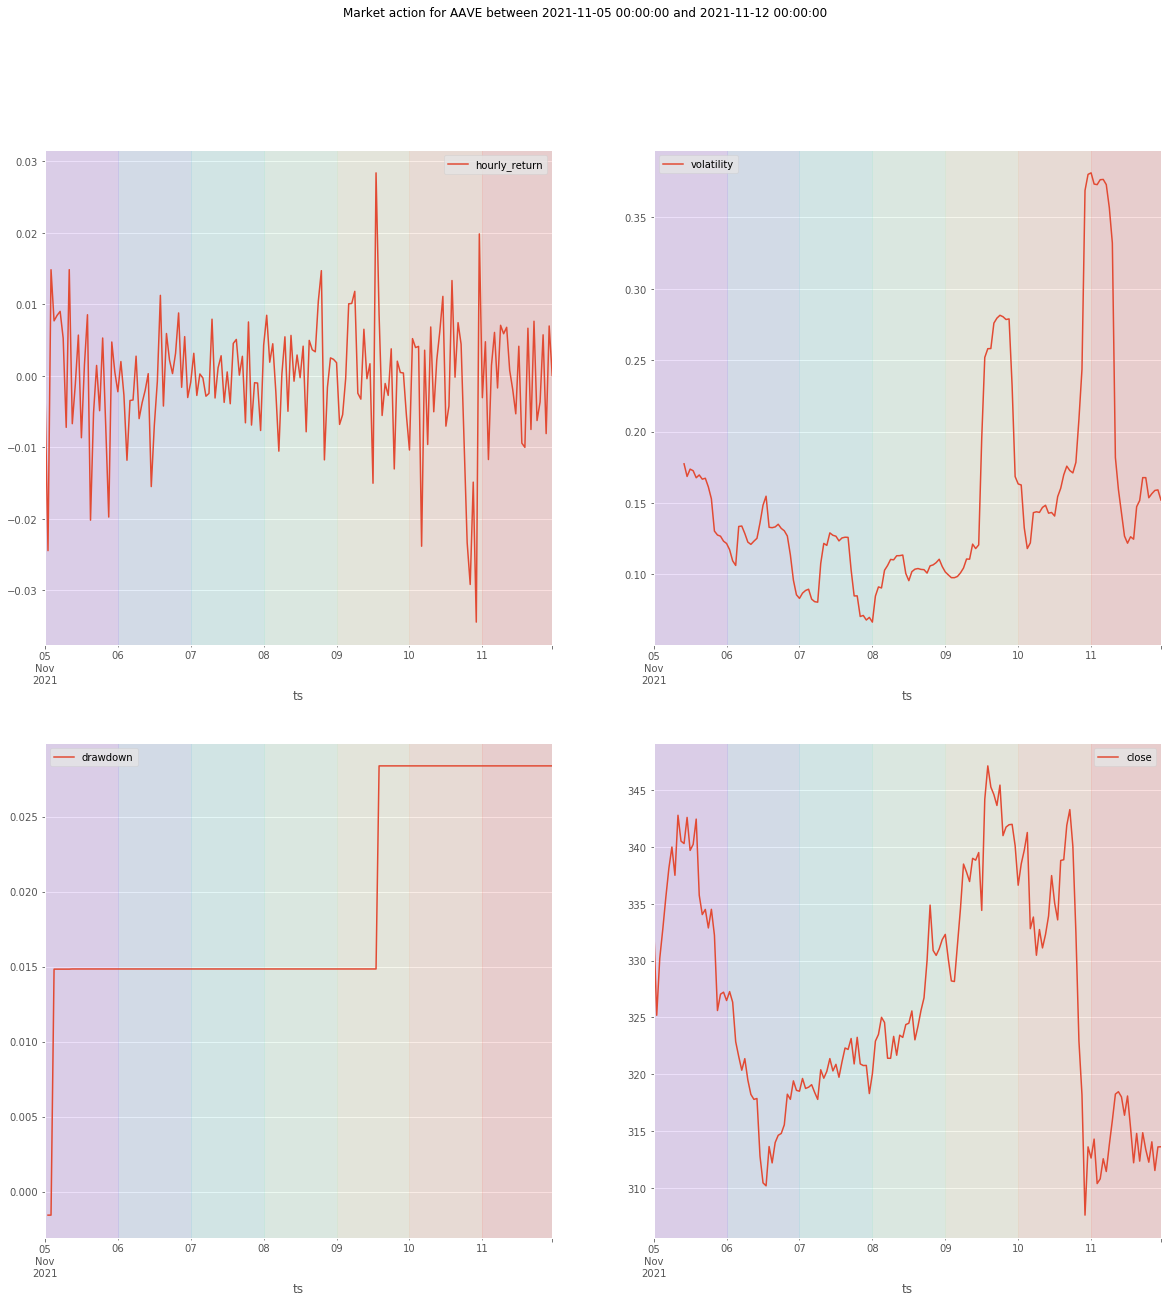

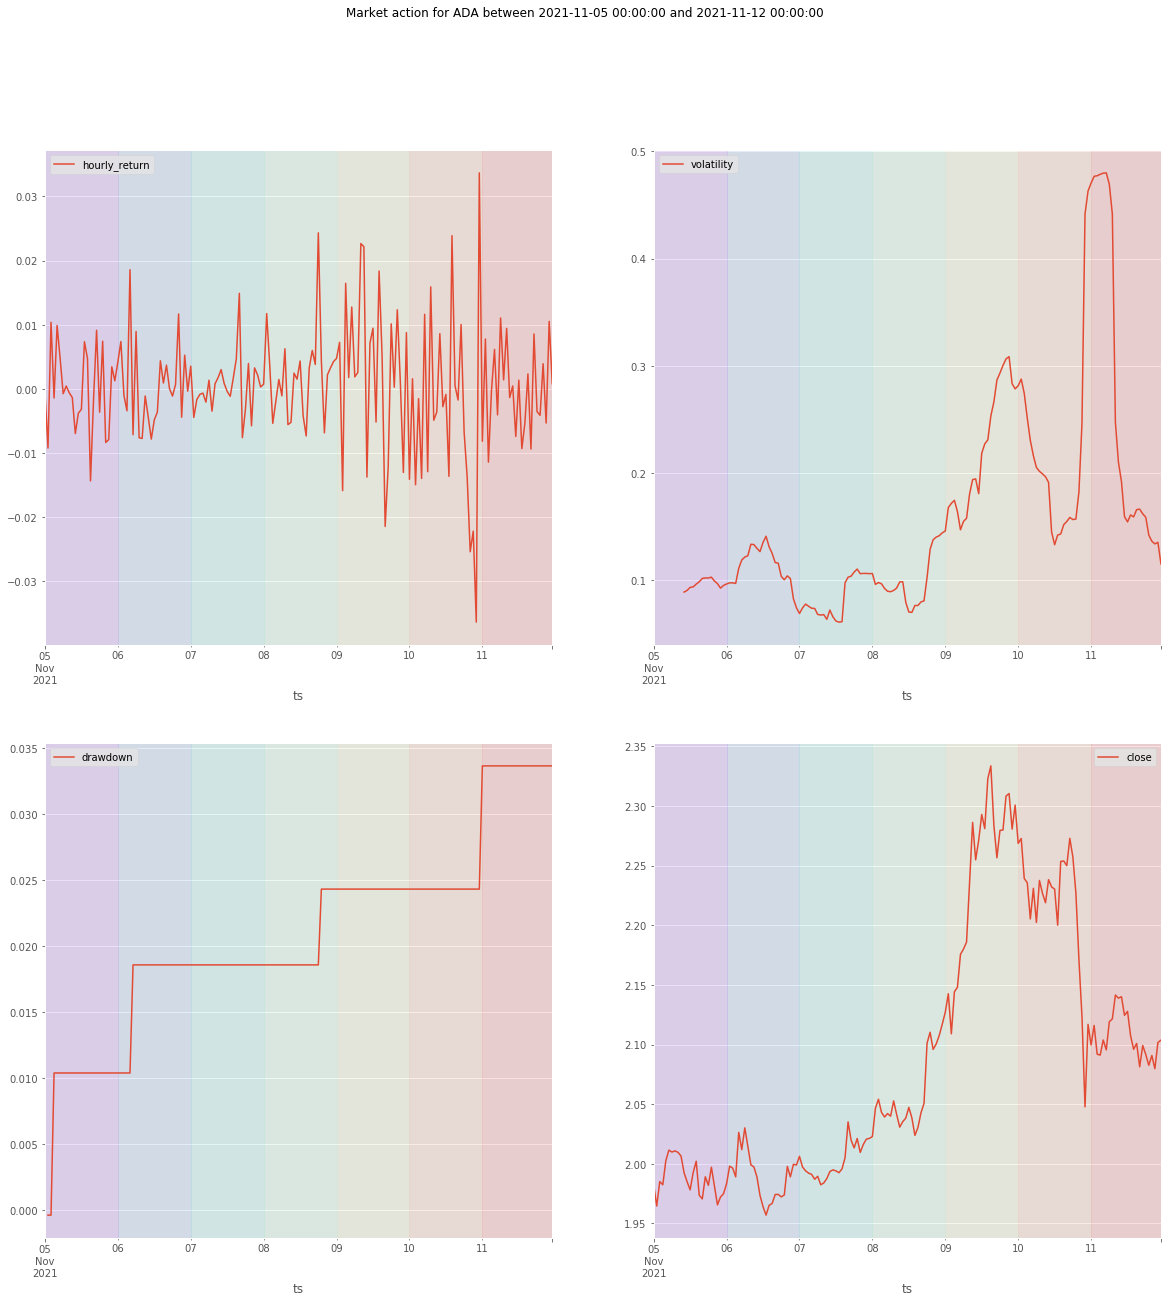

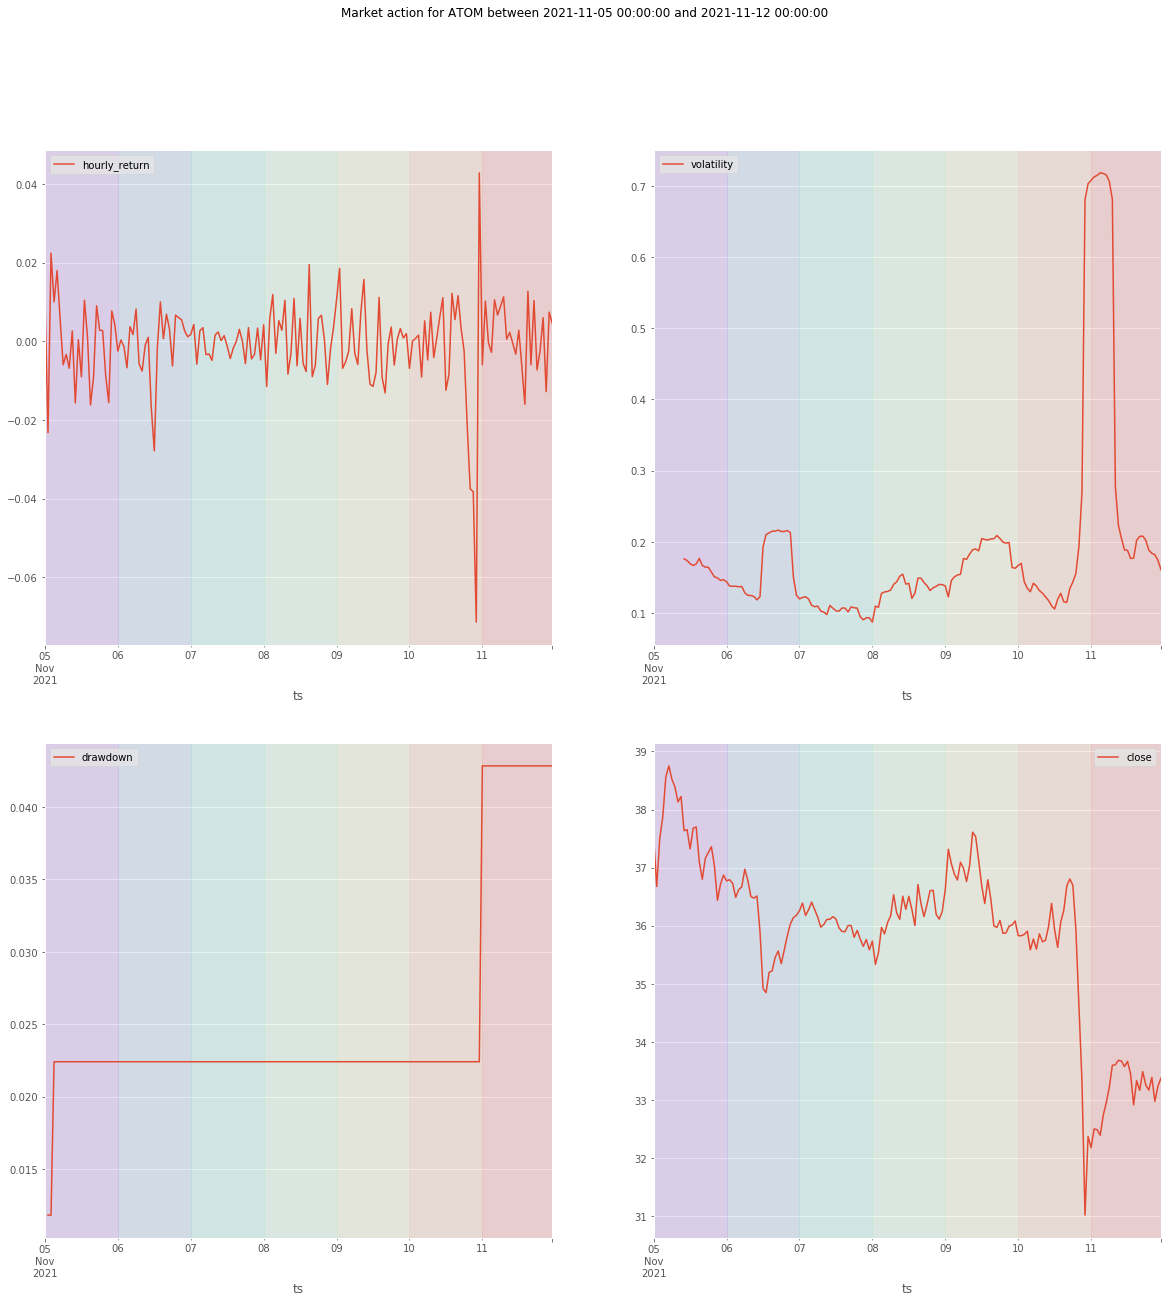

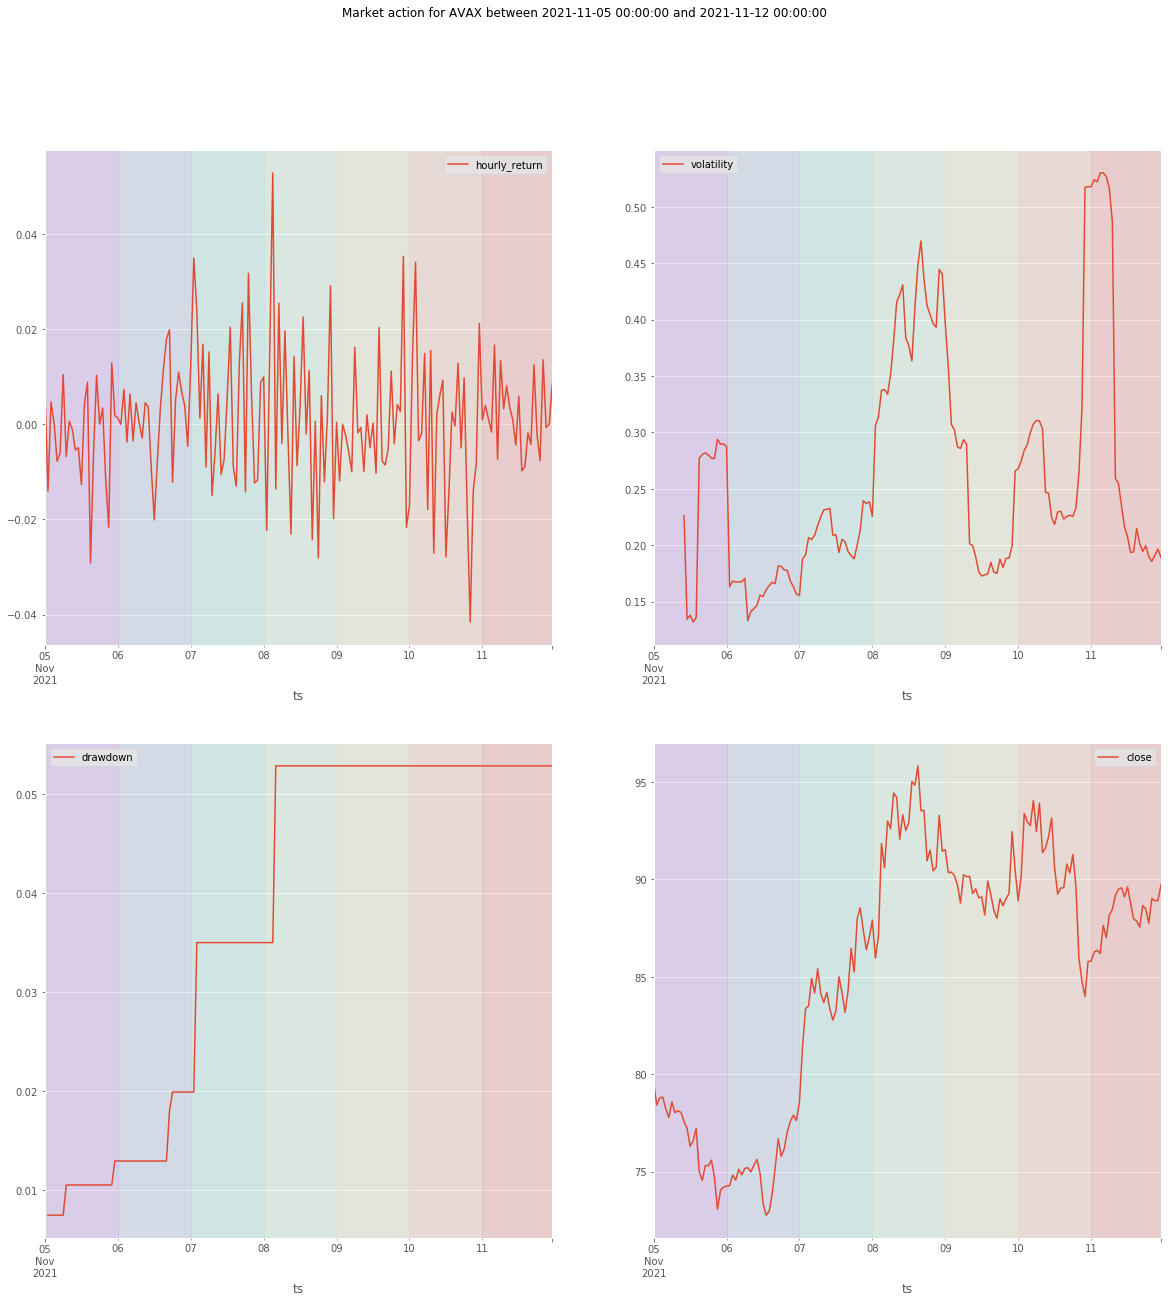

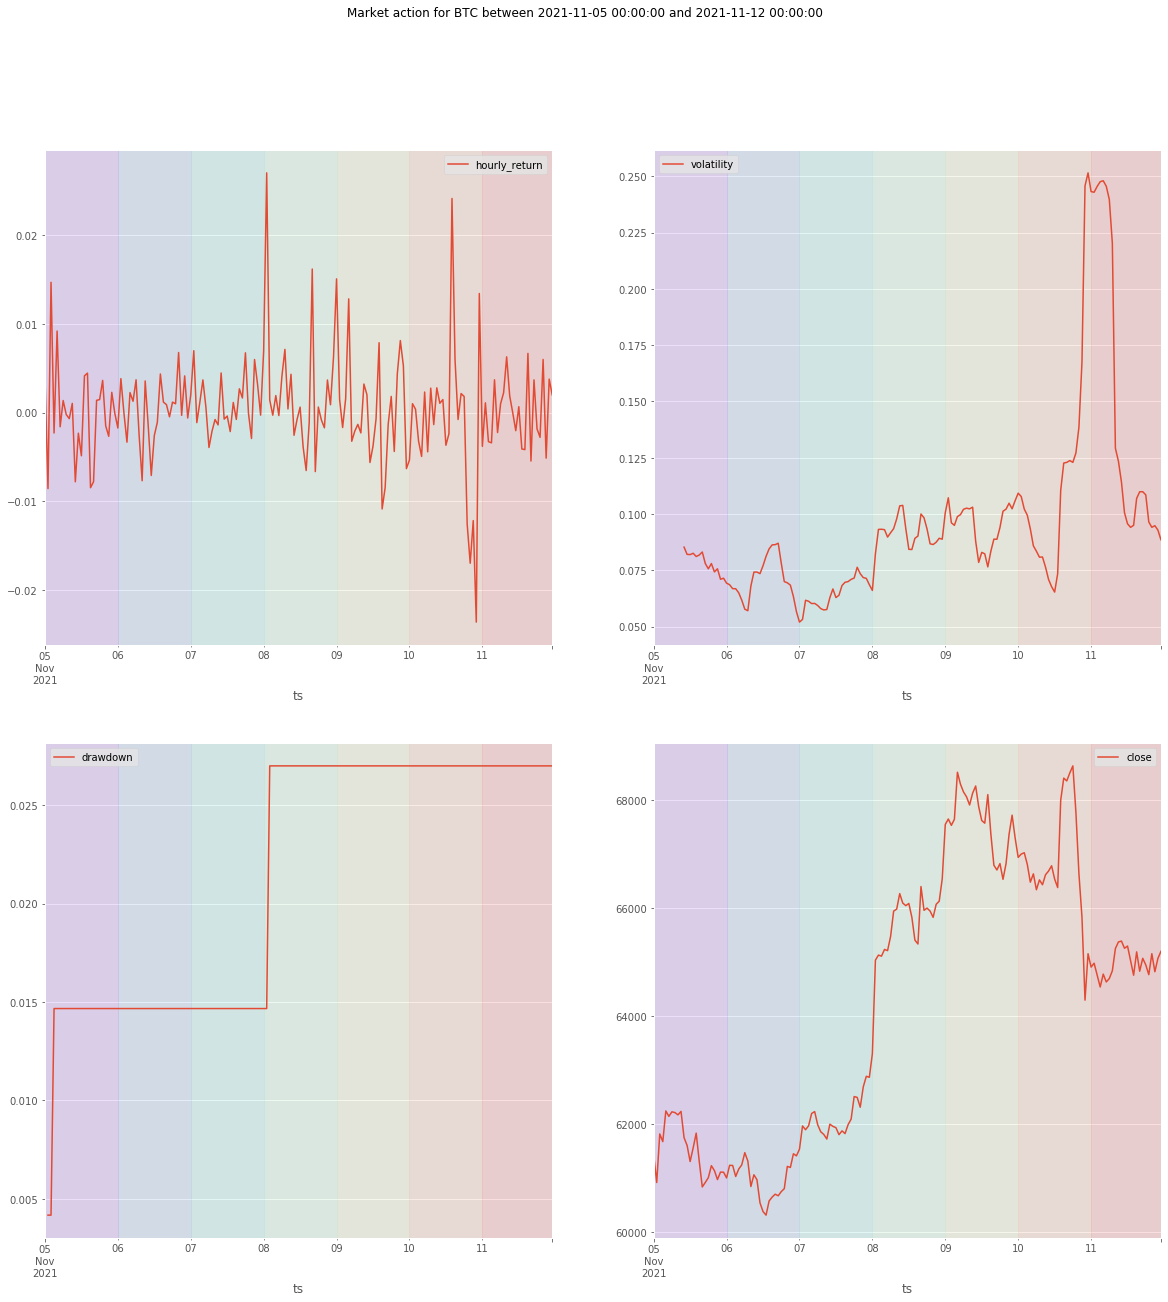

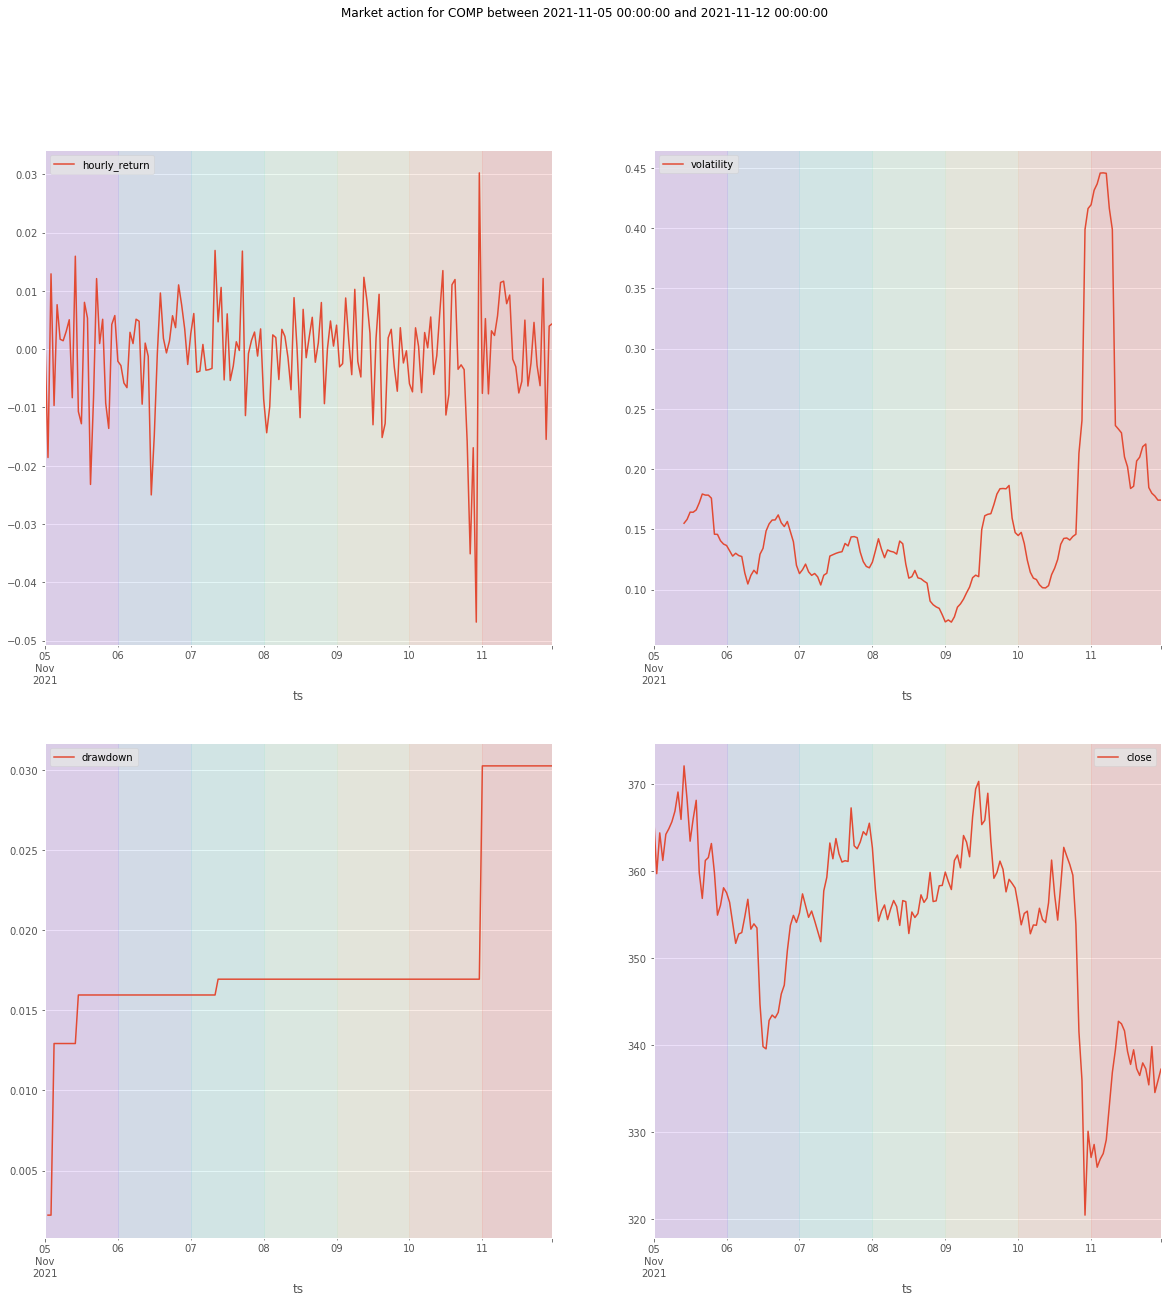

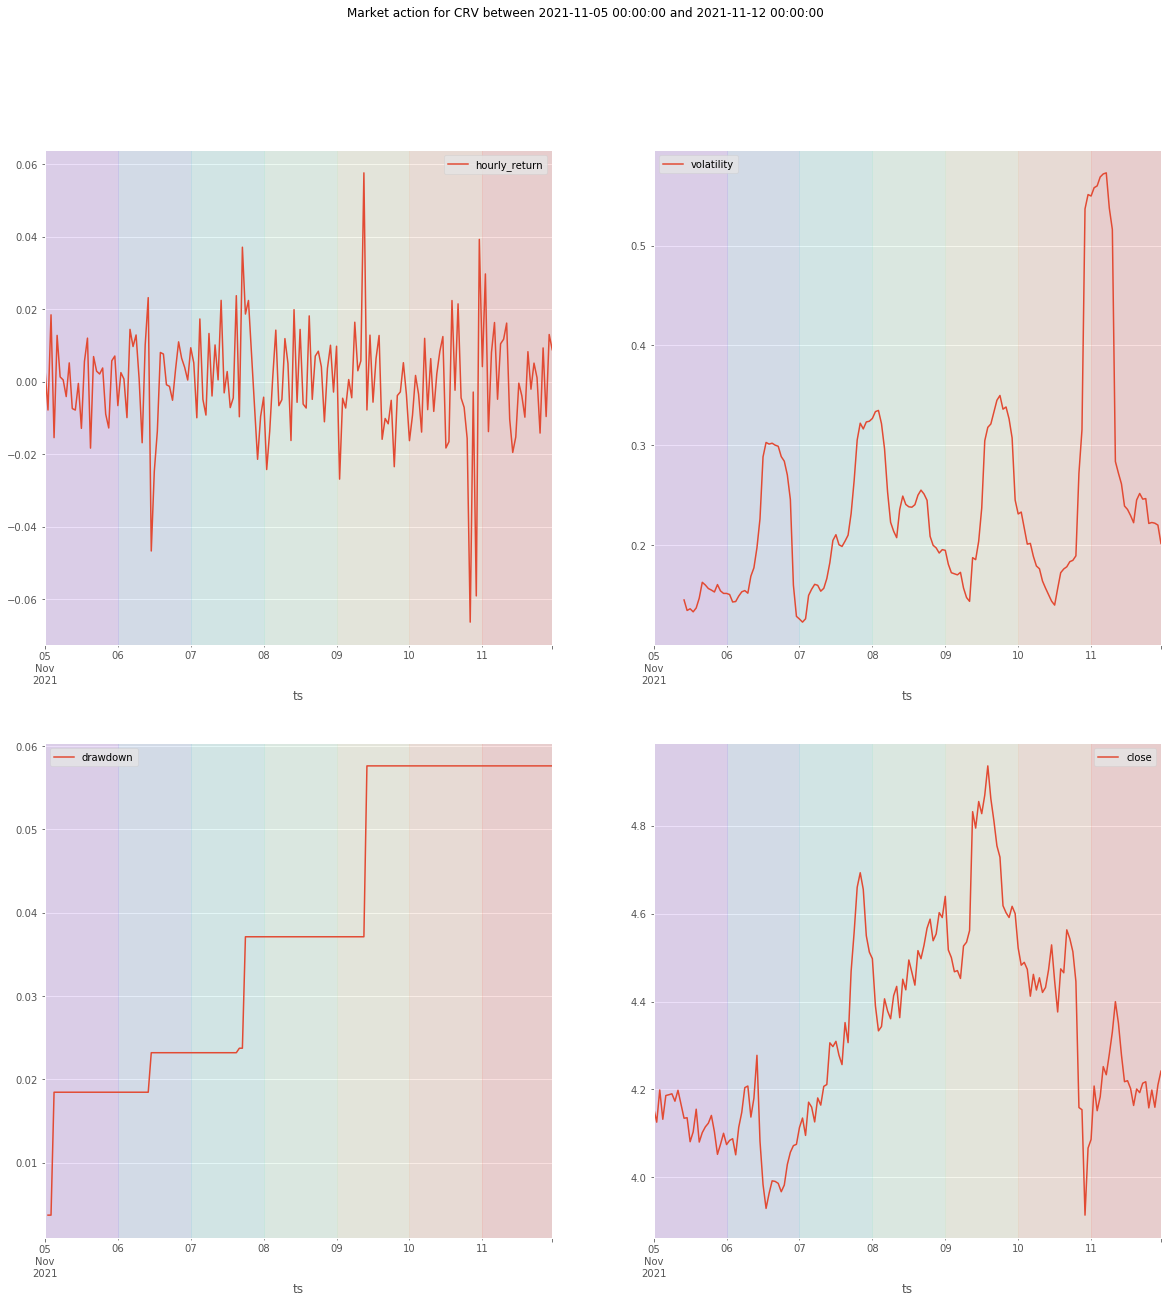

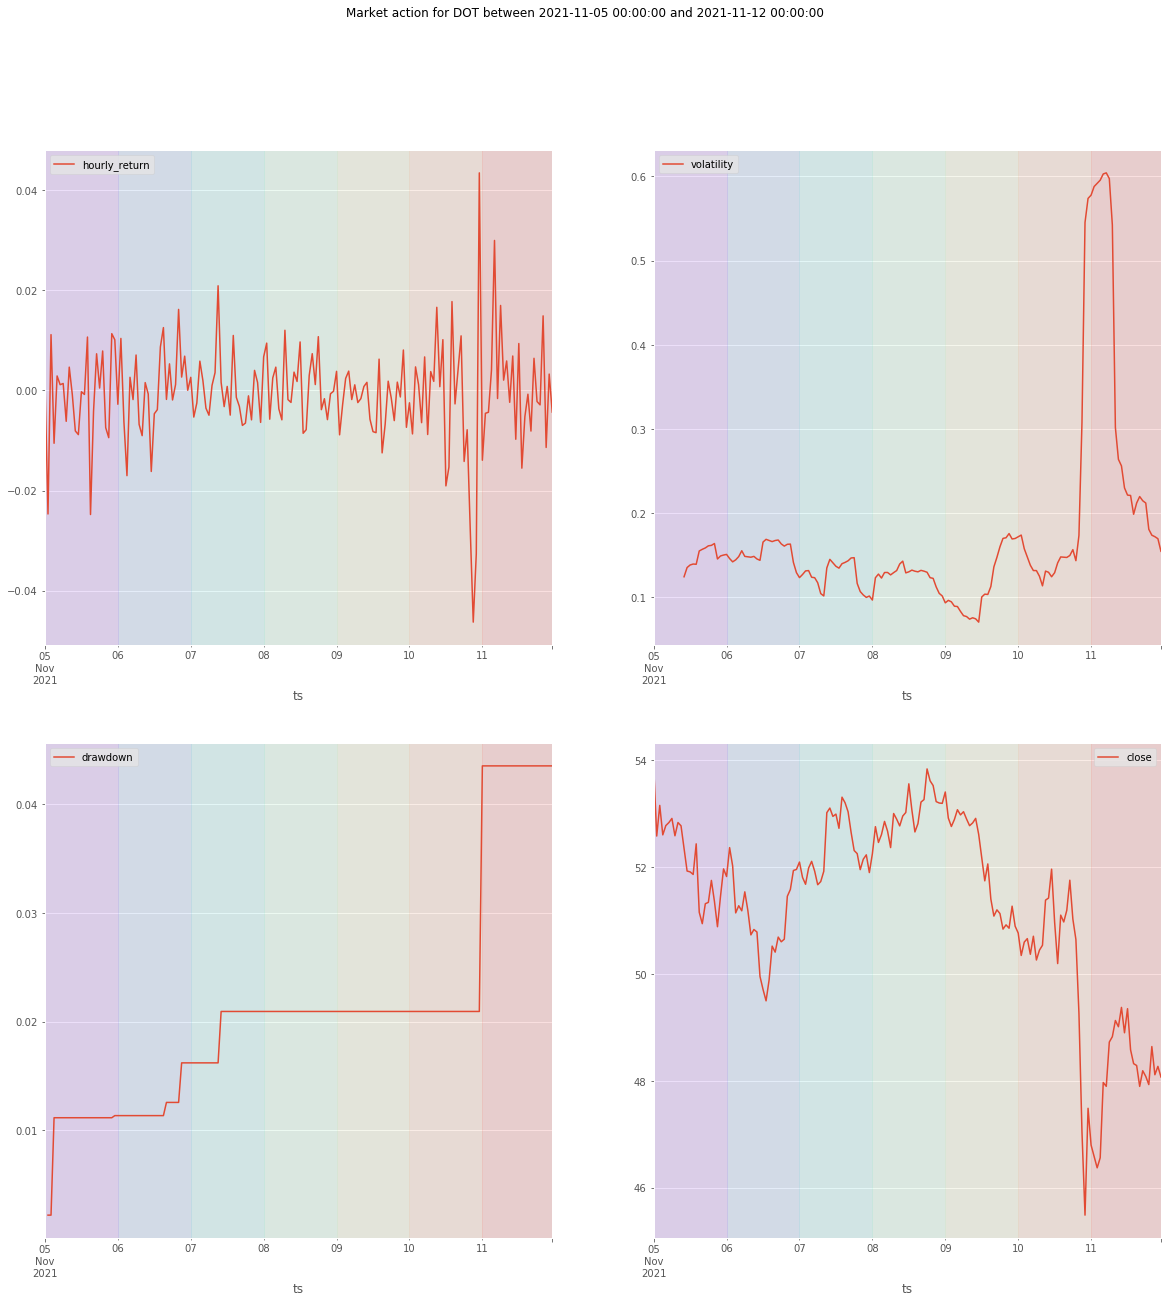

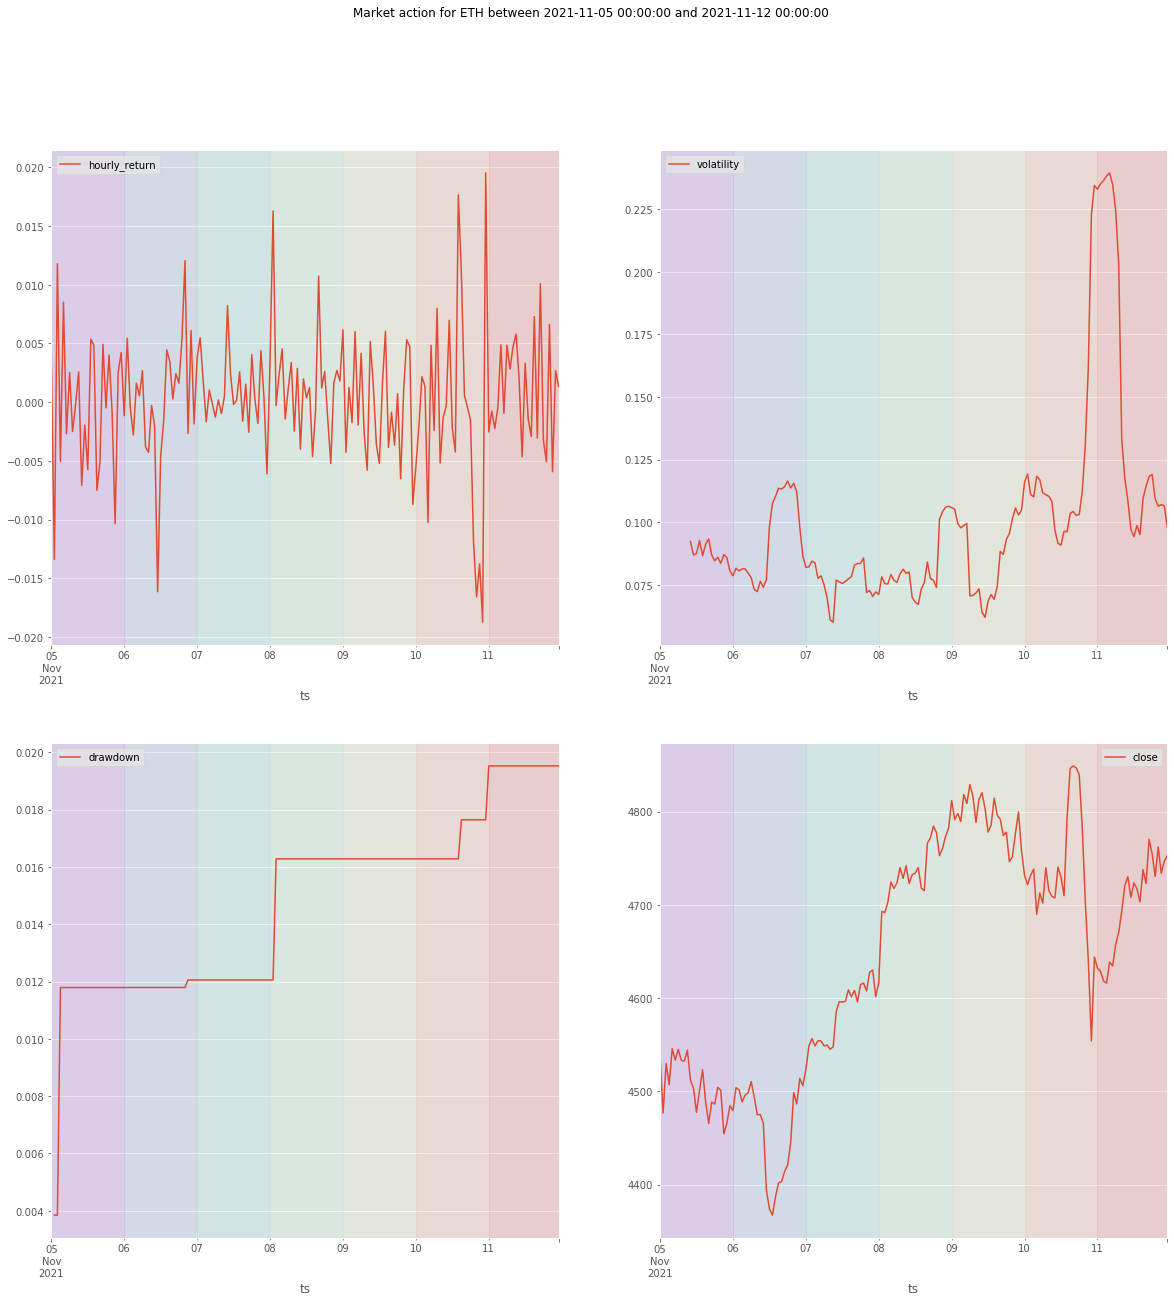

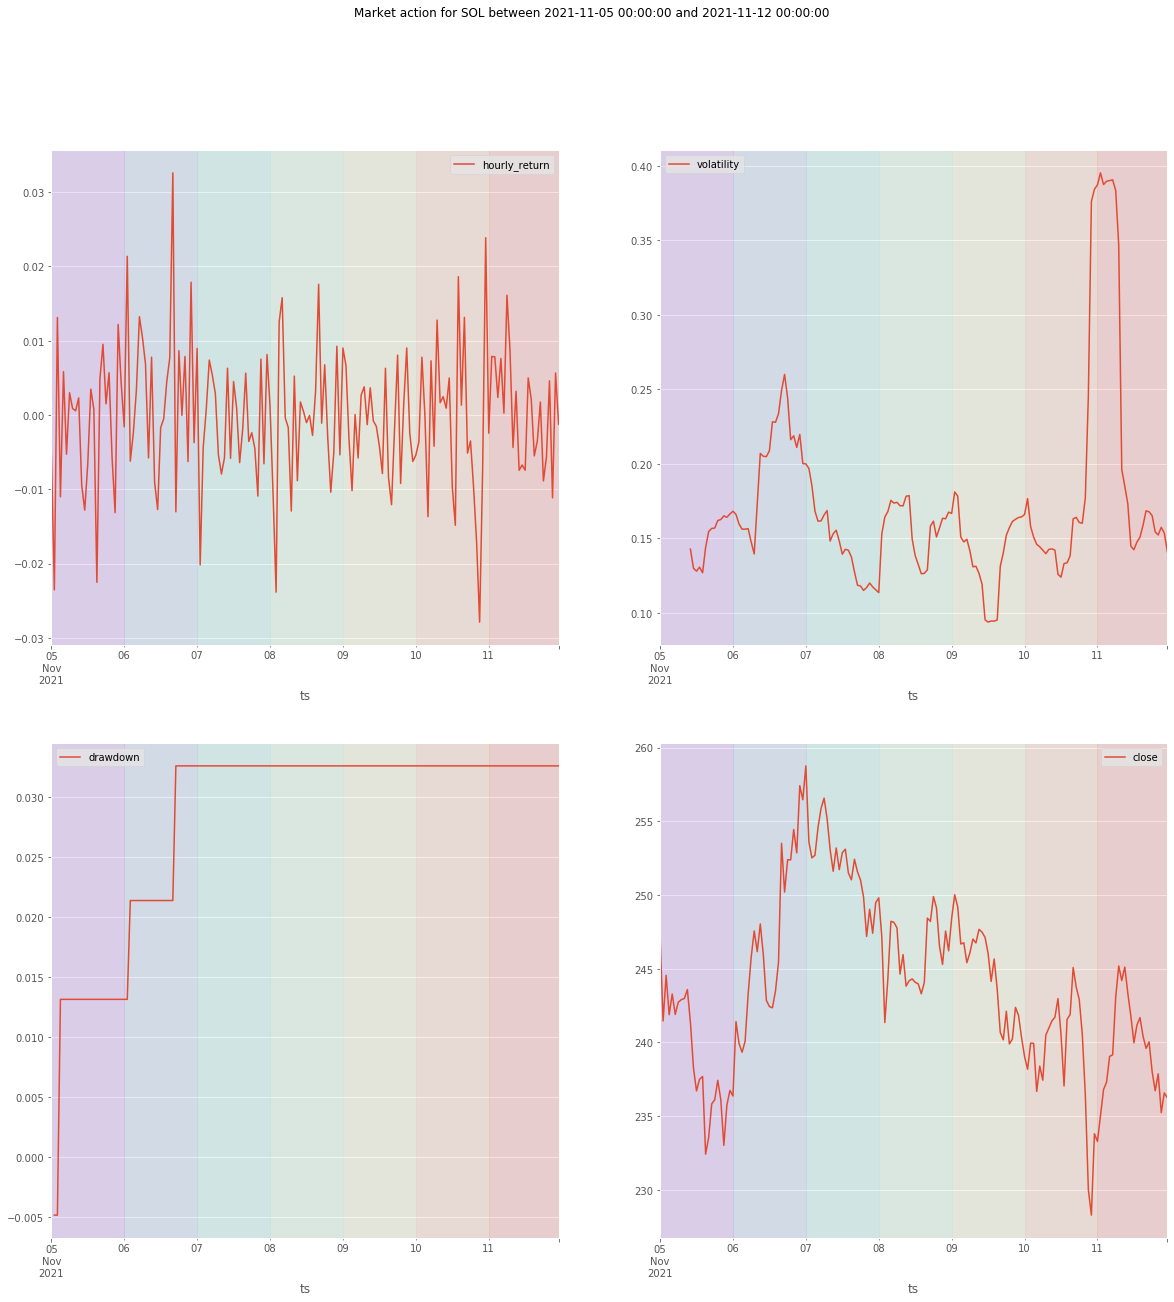

In [ ]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]